In [81]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [82]:
# Import dataset

house = pd.read_csv('data.csv')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [83]:
house.shape

(21613, 21)

In [84]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [85]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [86]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [87]:
# Isolate price from dataset

y = house.iloc[:, 2:3]
y

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


In [88]:
# Remove price from dataset

x = house.drop(['id','date','price','zipcode','lat','long'], axis='columns')
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287


In [89]:
# Feature selection - choose best features that have the highest correlation with price

sel = SelectFromModel(DecisionTreeRegressor(max_depth=15, random_state=33))
sel.fit(x,y)
x_new = sel.transform(x)
feature_idx = sel.get_support(indices=True)
feature_name = x.columns[feature_idx]

In [90]:
feature_name.shape

(3,)

In [91]:
feature_name

Index(['sqft_living', 'grade', 'yr_built'], dtype='object')

In [92]:
x = pd.DataFrame(x_new, columns=feature_name)
x

,sqft_living,grade,yr_built
0,1180.0,7.0,1955.0
1,2570.0,7.0,1951.0
2,770.0,6.0,1933.0
3,1960.0,7.0,1965.0
4,1680.0,8.0,1987.0
...,...,...,...
21608,1530.0,8.0,2009.0
21609,2310.0,8.0,2014.0
21610,1020.0,7.0,2009.0
21611,1600.0,8.0,2004.0


In [93]:
# Normalization (Data scaling)

scaler = MinMaxScaler(feature_range=(0,1))
x = scaler.fit_transform(x)
x = pd.DataFrame(x, columns=feature_name)
x

,sqft_living,grade,yr_built
0,0.067170,0.500000,0.478261
1,0.172075,0.500000,0.443478
2,0.036226,0.416667,0.286957
3,0.126038,0.500000,0.565217
4,0.104906,0.583333,0.756522
...,...,...,...
21608,0.093585,0.583333,0.947826
21609,0.152453,0.583333,0.991304
21610,0.055094,0.500000,0.947826
21611,0.098868,0.583333,0.904348


In [94]:
y.shape

(21613, 1)

In [95]:
y = scaler.fit_transform(pd.DataFrame(y))
y

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

In [96]:
# Split into training and testing datasets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33,shuffle=True,random_state=42)

In [97]:
name = []
Test_score = []

In [98]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=30,max_depth=30, random_state=33)
RandomForestRegressorModel.fit(x, y)
name.append("RandomForestRegressorModel")
print('Linear Regression Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
print('Linear Regression Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))
Test_score.append(RandomForestRegressorModel.score(X_test, y_test))

Linear Regression Train Score is :  0.923950518140587
Linear Regression Test Score is :  0.9255155596249556


In [99]:
LinearRegressionModel = LinearRegression(fit_intercept=True,copy_X=True,n_jobs=-1)
LinearRegressionModel.fit(x, y)
name.append("LinearRegressionModel")
print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, y_test))
Test_score.append(LinearRegressionModel.score(X_test, y_test))

Linear Regression Train Score is :  0.6069827970329678
Linear Regression Test Score is :  0.5957538265846991


In [100]:
DecisionTreeRegressorModel = DecisionTreeRegressor(max_depth=15,random_state=33)
DecisionTreeRegressorModel.fit(x, y)
name.append("DecisionTreeRegressorModel")
print('DecisionTreeRegressor Train Score is : ' , DecisionTreeRegressorModel.score(X_train, y_train))
print('DecisionTreeRegressor Test Score is : ' , DecisionTreeRegressorModel.score(X_test, y_test))
Test_score.append(DecisionTreeRegressorModel.score(X_test, y_test))

DecisionTreeRegressor Train Score is :  0.8956695359691872
DecisionTreeRegressor Test Score is :  0.911637135924162


In [101]:
from sklearn.ensemble import GradientBoostingRegressor
GBRModel = GradientBoostingRegressor(n_estimators=100,max_depth=15,learning_rate = 0.8 ,random_state=33)
GBRModel.fit(x, y)

#Calculating Details
print('GBRModel Train Score is : ' , GBRModel.score(X_train, y_train))
print('GBRModel Test Score is : ' , GBRModel.score(X_test, y_test)) 

GBRModel Train Score is :  0.9696181145066475
GBRModel Test Score is :  0.9755612165037035


In [102]:
from sklearn.neural_network import MLPRegressor

MLPRegressorModel = MLPRegressor(activation='relu', # can be also identity , logistic , relu
                                 solver='lbfgs',  # can be also sgd , adam
                                 learning_rate='adaptive', # can be also invscaling , adaptive
                                 early_stopping= False,
                                 alpha=0.0001 ,hidden_layer_sizes=(100, 3),random_state=33)
MLPRegressorModel.fit(x, y)
name.append("MLPRegressor")

#Calculating Details
print('MLPRegressorModel Train Score is : ' , MLPRegressorModel.score(X_train, y_train))
print('MLPRegressorModel Test Score is : ' , MLPRegressorModel.score(X_test, y_test))
Test_score.append(MLPRegressorModel.score(X_test, y_test))

MLPRegressorModel Train Score is :  0.6654647118928626
MLPRegressorModel Test Score is :  0.6603040815421557


In [103]:
Model=pd.DataFrame (name,columns = ['Model'])   
Test_Accuracy=pd.DataFrame (Test_score,columns = ['Test_Accuracy'])   

pd.concat([Model, Test_Accuracy], axis=1)

,Model,Test_Accuracy
0,RandomForestRegressorModel,0.925516
1,LinearRegressionModel,0.595754
2,DecisionTreeRegressorModel,0.911637
3,MLPRegressor,0.660304


In [104]:
# Let use both RandomForestRegressor and DecisionTreeRegressor models

y_pred_rfr = RandomForestRegressorModel.predict(X_test)
data_rfr = pd.DataFrame (y_pred_rfr, columns=["predicted_salePrice"])
data_rfr['Actual_SalesPrice'] = y_test

In [105]:
data.head(10)

,predicted_salePrice,Actual_SalesPrice
0,0.037969,0.038033
1,0.098457,0.103607
2,0.132775,0.126295
3,0.235467,0.185574
4,0.081355,0.083410
5,0.022273,0.017836
6,0.097813,0.093770
7,0.075718,0.079344
8,0.042824,0.040590
9,0.061830,0.069508


<Axes: ylabel='Density'>

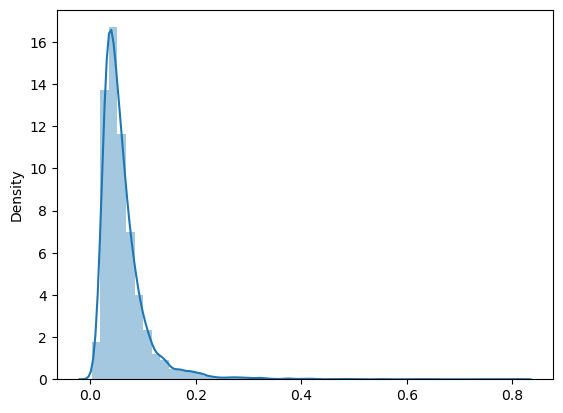

In [106]:
sns.distplot(y_pred_rfr)

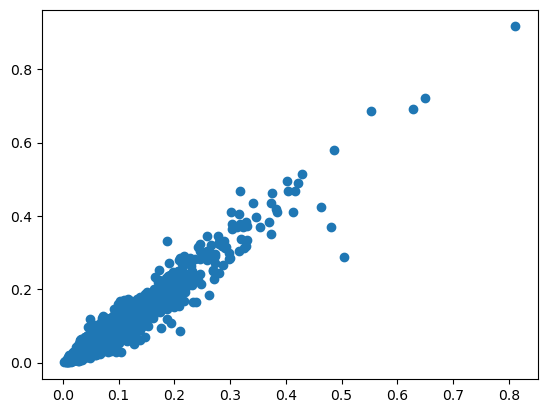

In [107]:
plt.scatter(y_pred_rfr, y_test)

In [108]:
y_pred_dtr = DecisionTreeRegressorModel.predict(X_test)
data_dtr = pd.DataFrame(y_pred_dtr, columns=["predicted_salePrice"])
data_dtr['Actual_SalesPrice'] = y_test

In [109]:
data_dtr

,predicted_salePrice,Actual_SalesPrice
0,0.050904,0.038033
1,0.068808,0.103607
2,0.137527,0.126295
3,0.185574,0.185574
4,0.085569,0.083410
...,...,...
7128,0.028294,0.022951
7129,0.033967,0.048852
7130,0.067759,0.072787
7131,0.063213,0.069115


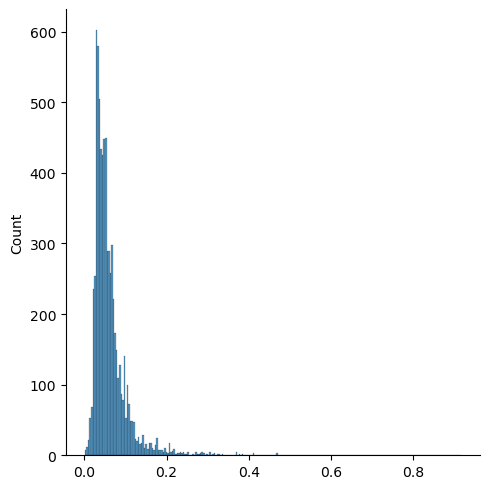

In [110]:
sns.displot(y_pred_dtr)

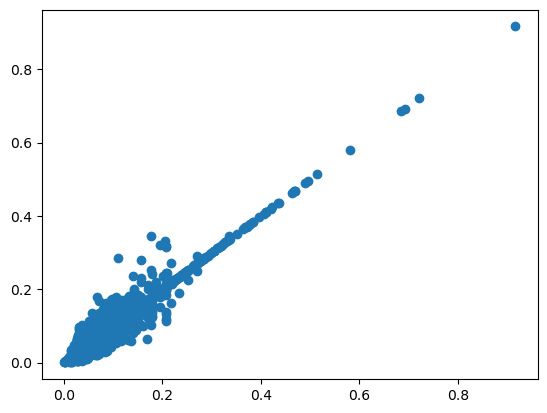

In [111]:
plt.scatter(y_pred_dtr, y_test)